<a href="https://colab.research.google.com/github/C4st3ll4n/google_colab/blob/master/enem2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_resposta= pd.DataFrame()

In [ ]:
print(set(df_test.columns).issubset(set(df_train.columns)))

True


In [ ]:
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [ ]:
df_test = df_test.select_dtypes(include=['int64','float64'])

In [ ]:
var = ['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [ ]:
df_test[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.293714,-0.105278,-0.048229,-0.079171,-0.161202
IN_TREINEIRO,-0.293714,1.000000,-0.009669,-0.032181,-0.004934,-0.014277
NU_NOTA_CN,-0.105278,-0.009669,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,-0.048229,-0.032181,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,-0.079171,-0.004934,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,-0.161202,-0.014277,0.442692,0.537141,0.495745,1.000000


In [ ]:
features = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

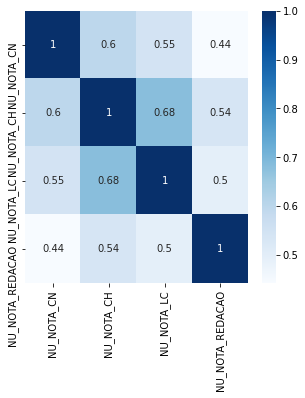

In [ ]:
%matplotlib inline

plt.figure(figsize=(5,5))
sns.heatmap(df_test[features].corr(), annot=True, cmap="Blues", linecolor="black")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

In [ ]:
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [ ]:
df_test[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

In [ ]:
df_train['NU_NOTA_CN'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
df_train['NU_NOTA_CH'].fillna(df_train['NU_NOTA_CH'].mean(), inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(df_train['NU_NOTA_REDACAO'].mean(), inplace=True)
df_train['NU_NOTA_LC'].fillna(df_train['NU_NOTA_LC'].mean(), inplace=True)

In [ ]:
df_test['NU_NOTA_CN'].fillna(df_test['NU_NOTA_CN'].mean(), inplace=True)
df_test['NU_NOTA_CH'].fillna(df_test['NU_NOTA_CH'].mean(), inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(df_test['NU_NOTA_REDACAO'].mean(), inplace=True)
df_test['NU_NOTA_LC'].fillna(df_test['NU_NOTA_LC'].mean(), inplace=True)

In [ ]:
y = df_train["NU_NOTA_MT"]

In [ ]:
#features = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
x_train = df_train[features]

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [ ]:
x_train_scaled = scaler.transform(x_train)

In [ ]:
print(f"Média:{x_train_scaled.mean(axis=1)}")
print(f"Desvio Padrão:{x_train_scaled.std(axis=1)}")

Média:[-7.68715657e-02  4.22804469e-01 -1.95622426e-01 -3.23155923e-02
  1.36921697e+00  4.63411533e-01 -6.52599635e-01 -7.23338230e-03
 -2.28673587e-01 -6.20934397e-01  1.35491479e+00 -1.38267258e-01
 -5.21216407e-01  1.06911230e+00 -5.95979471e-02 -7.91577598e-01
 -5.31456364e-01 -1.79872968e-01  2.58442854e-01  2.27695501e-01
 -3.88682617e-01 -3.98751528e-01 -3.02352056e-01  5.89447711e-01
 -4.41042894e-01 -2.27945758e-01 -9.74839625e-02 -2.43256020e-01
  9.67950246e-01 -5.27205326e-01  1.06032162e+00  6.94081379e-01
  5.45043050e-01  5.31589543e-01  7.29439094e-01 -1.43587311e+00
 -1.35702645e+00 -4.34999179e-01 -6.25117583e-01  8.18094592e-01
  8.90494429e-01 -3.28741365e-01 -8.09313605e-01 -9.28580761e-02
  1.36225690e+00 -7.47819959e-01 -4.41364581e-01  2.03057501e-01
  8.74487731e-02 -5.03647489e-01 -1.65601768e-01 -7.01584836e-01
 -2.45352748e-01 -6.81882633e-01 -7.46032336e-02 -3.50994941e-01
  3.72432832e-01 -5.54053612e-01 -9.34314967e-01 -1.26932866e-01
 -1.52211059e-01 -6

In [ ]:
x_test = df_test[features]

In [ ]:
pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestRegressor(
  n_estimators=1200, n_jobs=-1, warm_start=True 
))

In [ ]:
hiper_parametros = {'randomforestregressor__max_features':['auto','sqrt','log2'],
                    'randomforestregressor__max_depth':[None, 5, 3, 1]}

In [ ]:
clf = GridSearchCV(pipeline, hiper_parametros, cv=200)
clf.fit(x_train_scaled, y)

In [ ]:
print(clf.best_params_)

In [ ]:
pred_notas = clf.predict(x_test)

In [ ]:
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)

In [ ]:
df_resposta['NU_NOTA_MT'].unique()

In [ ]:
df_resposta.to_csv("answer.csv", index=False, header=True)

In [ ]:
joblib.dump(clf, "rf_regressor.pkl")

clf2=joblib.load("rf_regressor.pkl")
clf2.predict(x_test)